In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
#iris

In [5]:
x_org, y_org = iris.data, iris.target
x_select = x_org[:, [0,2]]
#x_select

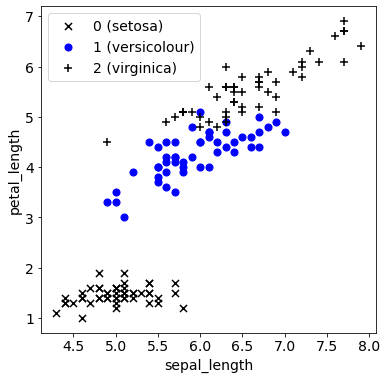

In [6]:
x_t0 = x_select[y_org == 0]
x_t1 = x_select[y_org == 1]
x_t2 = x_select[y_org == 2]
plt.figure(figsize=(6,6))
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('petal_length', fontsize=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(fontsize=14)
plt.show()

In [8]:
x_all = np.insert(x_select, 0, 1.0, axis=1)
#x_all

In [11]:
### one-hot-vector
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, categories='auto')
y_work = np.c_[y_org]
y_all_one = ohe.fit_transform(y_work)
#y_all_one

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, y_train_one, y_test_one = train_test_split(
    x_all, y_org, y_all_one, train_size=75, test_size=75, random_state=123
)
#x_all.shape, y_org.shape, y_all_one.shape
#x_train.shape, x_test.shape, y_train.shape, y_test.shape, y_train_one.shape, y_test_one.shape

((150, 3), (150,), (150, 3))

In [21]:
#x_train[:5, :]

In [22]:
x, yt = x_train, y_train_one

In [23]:
def softmax(x):
    x = x.T
    x_max = x.max(axis=0)
    x = x-x_max
    w = np.exp(x)
    return (w / w.sum(axis=0)).T

In [33]:
a = np.array([[1,2,3],[0,5,6]])
np.sum(softmax(a), axis=1)

array([1., 1.])

In [34]:
def pred(x, W):
    return softmax(x @ W)

In [35]:
def cross_entropy(yt, yp):
    return -np.mean(np.sum(yt * np.log(yp), axis=1))

In [36]:
from sklearn.metrics import accuracy_score

def evaluate(x_test, y_test, y_test_one, W):
    yp_test_one = pred(x_test, W)
    yp_test = np.argmax(yp_test_one, axis=1)
    loss = cross_entropy(y_test_one, yp_test_one)
    score = accuracy_score(y_test, yp_test)
    return loss, score

In [37]:
M = x.shape[0]
D = x.shape[1]
N = yt.shape[1]
iters = 10000
η = 0.01
W = np.ones((D, N))
history = np.zeros((0, 3))

In [39]:
for k in range(iters):
    yp = pred(x, W)
    yd = yp - yt
    W = W - η*(x.T @ yd / M)
    
    if(k%10 == 0):
        loss, score = evaluate(x_test, y_test, y_test_one, W)
        history = np.vstack((history, np.array([k, loss, score])))
        print("epoch = %d, loss = %f, score = %f"%(k, loss, score))

epoch = 0, loss = 1.092628, score = 0.266667
epoch = 10, loss = 1.064035, score = 0.266667
epoch = 20, loss = 1.033466, score = 0.266667
epoch = 30, loss = 1.002645, score = 0.266667
epoch = 40, loss = 0.973510, score = 0.266667
epoch = 50, loss = 0.946309, score = 0.386667
epoch = 60, loss = 0.920978, score = 0.560000
epoch = 70, loss = 0.897402, score = 0.600000
epoch = 80, loss = 0.875452, score = 0.613333
epoch = 90, loss = 0.855005, score = 0.626667
epoch = 100, loss = 0.835942, score = 0.626667
epoch = 110, loss = 0.818152, score = 0.626667
epoch = 120, loss = 0.801532, score = 0.626667
epoch = 130, loss = 0.785986, score = 0.626667
epoch = 140, loss = 0.771424, score = 0.640000
epoch = 150, loss = 0.757767, score = 0.653333
epoch = 160, loss = 0.744941, score = 0.680000
epoch = 170, loss = 0.732877, score = 0.706667
epoch = 180, loss = 0.721513, score = 0.760000
epoch = 190, loss = 0.710795, score = 0.786667
epoch = 200, loss = 0.700670, score = 0.786667
epoch = 210, loss = 0.69

In [40]:
print('初始狀態: loss = %f, accuracy = %f'%(history[0, 1], history[0, 2]))
print('最終狀態: loss = %f, accuracy = %f'%(history[-1,1], history[-1,2]))

初始狀態: loss = 1.092628, accuracy = 0.266667
最終狀態: loss = 0.197948, accuracy = 0.960000


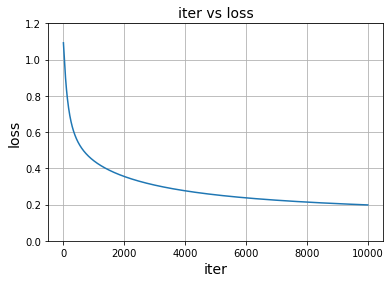

In [41]:
plt.plot(history[:,0], history[:,1])
plt.grid()
plt.ylim(0,1.2)
plt.xlabel('iter', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.title('iter vs loss', fontsize=14)
plt.show()

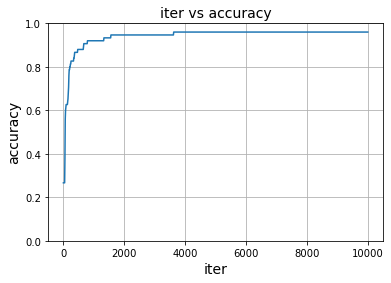

In [42]:
plt.plot(history[:,0], history[:,2])
plt.ylim(0,1)
plt.grid()
plt.xlabel('iter', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.title('iter vs accuracy', fontsize=14)
plt.show()

In [48]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
x1 = np.linspace(4, 8.5, 100)
x2 = np.linspace(0.5, 7.5, 100)
xx1, xx2 = np.meshgrid(x1, x2)
xxx = np.array([np.ones(xx1.ravel().shape), 
    xx1.ravel(), xx2.ravel()]).T
pp = pred(xxx, W)
c0 = pp[:,0].reshape(xx1.shape)
c1 = pp[:,1].reshape(xx1.shape)
c2 = pp[:,2].reshape(xx1.shape)
plt.figure(figsize=(8,8))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot_surface(xx1, xx2, c0, color='lightblue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c1, color='blue', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.plot_surface(xx1, xx2, c2, color='lightgrey', 
    edgecolor='black', rstride=10, cstride=10, alpha=0.7)
ax.scatter(x_t0[:,0], x_t0[:,1], 1, s=50, alpha=1, marker='+', c='r')
ax.scatter(x_t1[:,0], x_t1[:,1], 1, s=30, alpha=1, marker='o', c='g')
ax.scatter(x_t2[:,0], x_t2[:,1], 1, s=50, alpha=1, marker='x', c='orange')
ax.set_xlim(4,8.5)
ax.set_ylim(0.5,7.5)
ax.view_init(elev=40, azim=70)

In [49]:
# 評価
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# テストデータで予測値の計算
yp_test_one = pred(x_test, W)
yp_test = np.argmax(yp_test_one, axis=1)

#  精度の計算
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, yp_test)
print('accuracy: %f' % score)

# 混同行列の表示
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yp_test))
print(classification_report(y_test, yp_test))

accuracy: 0.960000
[[27  0  0]
 [ 0 20  0]
 [ 0  3 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.87      1.00      0.93        20
           2       1.00      0.89      0.94        28

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.97      0.96      0.96        75

